<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/Pandas_Alive_US_Deaths_Selected_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
# OurWorldinData data from ECDC
full_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv", index_col='date')

In [0]:
full_data.index = full_data.index.astype('<M8[ns]')

In [0]:
United_States = full_data.query("location == 'United States'")

In [0]:
# Numbers from Wikipedia
data = pd.DataFrame()
data['date'] = United_States[United_States['total_deaths']>0].reset_index()['date']
data['Covid-19'] = United_States[United_States['total_deaths']>0].reset_index()['total_deaths']
data['Vietnam War'] = 58209*np.ones(len(data))
data['Korean War'] = 54246*np.ones(len(data))
data['American Revolution'] = 25000*np.ones(len(data))
data['War of 1812'] = 15000*np.ones(len(data))
data['1900 Galveston Hurricane'] = 8000*np.ones(len(data))
data['Iraq War'] = 4497*np.ones(len(data))
data['1906 Earthquake'] = 3000*np.ones(len(data))
data['9/11'] = 2997*np.ones(len(data))
data['Hurricane Maria'] = 2982*np.ones(len(data))
data['Pearl Harbor'] = 2467*np.ones(len(data))
data['War in Afghanistan'] = 2216*np.ones(len(data))
data['Hurricane Katrina'] = 1836*np.ones(len(data))
data['Jonestown'] = 918*np.ones(len(data))
# data['World War I'] = 116516*np.ones(len(data))
# data['World War II'] = 405399*np.ones(len(data))
# data['1918 Flu'] = 675000*np.ones(len(data))
# data['Civil War'] = 750000*np.ones(len(data))
data = data.set_index('date')

In [0]:
!pip install -q pandas-alive

In [12]:
import pandas_alive
print(pandas_alive.version)

0.1.8


In [0]:
animated_line_chart = data.fillna(0).plot_animated(kind='line',period_length=200,show_period_annotation=False,figsize=(12,8), dpi=800)

In [0]:
animated_bar_chart = data.plot_animated(kind='barh',period_length=200,figsize=(12,8),dpi=800)

/usr/local/lib/python3.6/dist-packages/pandas_alive/charts.py:729: UserWarning: Attempting to set identical left == right == 737485.0 results in singular transformations; automatically expanding.
  self.ax.set_xlim(self.df.index[: i + 1].min(), self.df.index[: i + 1].max())


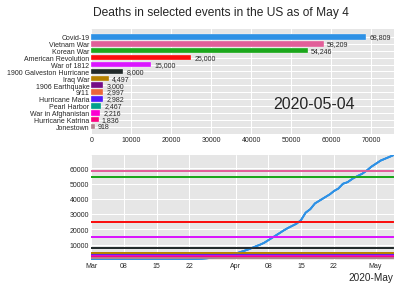

In [10]:
pandas_alive.animate_multiple_plots('example-bar-and-line-chart.mp4', plots=[animated_bar_chart,animated_line_chart], title="Deaths in selected events in the US as of May 4",adjust_subplot_left=0.2)

In [0]:
from google.colab import files
files.download("example-bar-and-line-chart.mp4")